In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

import plotly.express as px

import os
import sys

from scipy.optimize import minimize
# code to manage where are lunch the file
if str(os.getcwd()).split("/")[-1] == "notebooks":
    sys.path.insert(1, os.path.realpath(os.path.pardir))
    path_b = "../"
else:
    path_b ='./'
import config as c

In [2]:
windows = c.windows
number_crypto = c.number_cryptos
market_cap = c.market_cap

df_name_index = pd.read_csv(f"{path_b}data/processed/first_{number_crypto}_crypto_list.csv", index_col=0)
df = pd.read_csv(f"{path_b}data/processed/market_cap_crypto.csv", index_col=0)
df['date'] = pd.to_datetime(df.index)
df['date'] = df['date'].dt.date
df.index = df['date']
del df['date']

df_close_price = pd.read_csv(f'{path_b}data/processed/close_price_crypto.csv', index_col=0)
df_close_price['date'] = pd.to_datetime(df_close_price.index)
df_close_price['date'] = df_close_price['date'].dt.date
df_close_price.index = df_close_price['date']
del df_close_price['date']

## use market cap file

df_market_cap = pd.read_csv(f'{path_b}data/processed/crypto_date_marketcap_sorted.csv', index_col=0)


df_market_cap_first_20 = df_market_cap.iloc[:number_crypto]

#select last date
first_date = df_market_cap_first_20['first_date_marketcap'].tail(1).values

first_date_final = pd.to_datetime(first_date[0])

df_final_data = df_close_price.drop(df_close_price[df_close_price.index < first_date_final].index)
df_final_data = df_final_data[df_market_cap_first_20['crypto_name']]

df_final_market_cap = df.drop(df[df.index < first_date_final].index)
df_final_market_cap = df_final_market_cap[df_market_cap_first_20['crypto_name']]

df_final_data_return = np.log(df_final_data/df_final_data.shift(1)).dropna()

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [3]:
df_final_market_cap['sum'] = df_final_market_cap.sum(axis=1)
df_final_market_cap.head(4)

bitcoin      litecoin        ripple     dogecoin  \
date                                                                
2019-01-30  6.104426e+10  1.923946e+09  1.319129e+10  231532342.0   
2019-01-31  6.055390e+10  1.907588e+09  1.276215e+10  227283335.0   
2019-02-01  6.108875e+10  1.978857e+09  1.269965e+10  226308066.0   
2019-02-02  6.167512e+10  2.073873e+09  1.279823e+10  228611251.0   

                   dash       stellar          nem      ethereum  \
date                                                               
2019-01-30  595813352.0  1.641391e+09  424252007.0  1.139628e+10   
2019-01-31  587415757.0  1.583826e+09  363002865.0  1.120474e+10   
2019-02-01  580896463.0  1.602022e+09  368880644.0  1.126382e+10   
2019-02-02  585201223.0  1.592633e+09  369403166.0  1.156077e+10   

            ethereum-classic          neo  ...           eos  bitcoin-cash  \
date                                       ...                               
2019-01-30       434018070.0  462269051.0  ...  2.118811e+09  2.082945e+09   
2019-01-31       426751342.0  450552499.0  ...  2.103042e+09  2.020318e+09   
2019-02-01       426539328.0  457113160.0  ...  2.120783e+09  2.051266e+09   
2019-02-02       432377776.0  469944267.0  ...  2.203259e+09  2.143596e+09   

            binance-coin          tron    chainlink       cardano       theta  \
date                                                                            
2019-01-30   797597771.0  1.819292e+09  149425068.0  1.028152e+09  38394278.0   
2019-01-31   809728264.0  1.695282e+09  135691624.0  9.949265e+08  37436485.0   
2019-02-01   847729319.0  1.751408e+09  146742213.0  1.002817e+09  41293892.0   
2019-02-02   890238047.0  1.740804e+09  145224462.0  1.019387e+09  40656128.0   

                vechain  wrapped-bitcoin           sum  
date                                                    
2019-01-30  223915158.0              0.0  1.003352e+11  
2019-01-31  216756030.0              0.0  9.879855e+10  
2019-02-01  217801451.0              0.0  9.959275e+10  
2019-02-02  219142902.0              0.0  1.009062e+11  

[4 rows x 21 columns]

In [4]:
columns = df_final_market_cap.columns[:-1]

df_weight_cap_weigthed= df_final_market_cap[columns]

for column in df_weight_cap_weigthed.columns:
    df_weight_cap_weigthed[column] = df_weight_cap_weigthed[column] / df_final_market_cap['sum']

<ipython-input-4-7b74b3e60a16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight_cap_weigthed[column] = df_weight_cap_weigthed[column] / df_final_market_cap['sum']


Text(0.5, 1.0, 'Cap_weighted (Evolution of weights)')

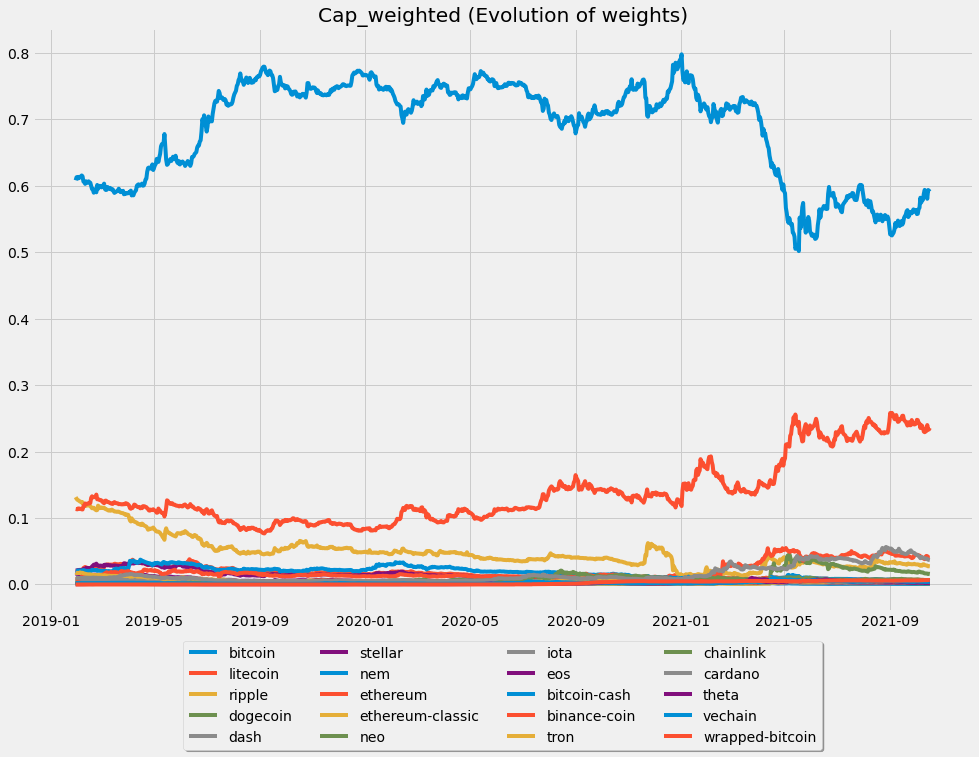

In [5]:
plt.figure(figsize=(15,10))
plt.plot(df_weight_cap_weigthed)
plt.legend(df_weight_cap_weigthed, loc="lower center", fancybox=True, shadow=True,ncol=4,bbox_to_anchor=(0.5, -0.25))
plt.title("Cap_weighted (Evolution of weights)")

In [6]:
# voir pour comparer bitcoin avec les autres crypto (peut être agréger les cryptos)
fig = px.line(df_weight_cap_weigthed, x=df_weight_cap_weigthed.index, y=df_weight_cap_weigthed.columns, title="Cap_weighted (Evolution of weights)",labels={'value':'weight'})
fig.show()

In [7]:
fig = px.scatter(df_weight_cap_weigthed['bitcoin'], x=df_weight_cap_weigthed['bitcoin'].index, y='bitcoin', title="Bitcoin (% of market cap)",labels={'bitcoin': "% of market cap"})
fig.show()

In [8]:
print(df_final_data_return.shape)
print(df_weight_cap_weigthed.shape)
print(df_weight_cap_weigthed.shape[0] - df_final_data_return.shape[0])

diff = df_weight_cap_weigthed.shape[0] - df_final_data_return.shape[0]

(991, 20)
(992, 20)
1


In [9]:
port_cap_weigthed = pd.DataFrame(np.sum(np.multiply(df_final_data_return, df_weight_cap_weigthed.iloc[diff:]),1)[2:],columns=['perf'])
port_cap_weigthed = port_cap_weigthed.drop(port_cap_weigthed[port_cap_weigthed.index == pd.to_datetime("2018-05-10") ].index)

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



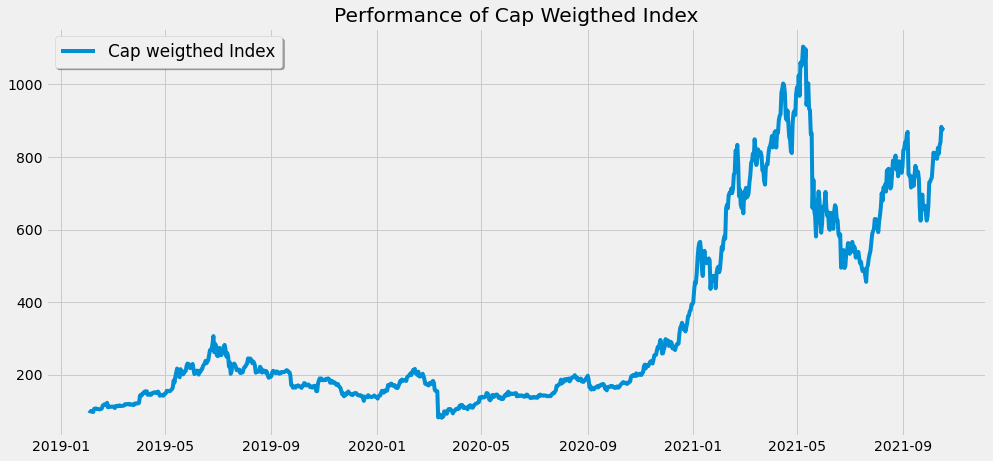

In [10]:
plt.figure(figsize=(15,7))
plt.plot((port_cap_weigthed['perf']+1).cumprod()*100)
plt.legend(['Cap weigthed Index'],loc='upper left',fontsize='large',fancybox=True, shadow=True)
plt.title('Performance of Cap Weigthed Index')
plt.show()

In [11]:
perf = (port_cap_weigthed['perf'].add(1)).cumprod()*100
fig = px.line(perf, x=perf.index, y=perf, title="Performance Cap Weigthed Index", labels={'y':'Performance (basis 100)'})
fig.show()

In [12]:
df_test = pd.DataFrame((port_cap_weigthed+1).cumprod())
df_test.columns = ['cum_perf']
# df_test
df_test.drop(df_test[df_test.cum_perf != np.inf ].index)
#2018-05-09	-> bug à 2018-05-10 (inf)

Empty DataFrame
Columns: [cum_perf]
Index: []

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning:

Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.



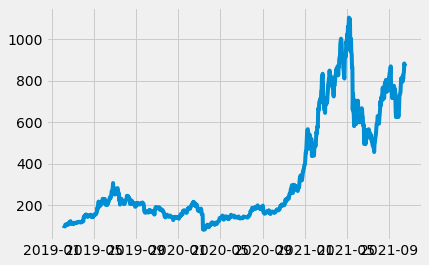

In [13]:
df_perf_test = pd.DataFrame(port_cap_weigthed)
df_perf_test.columns = ['perf']
final = df_perf_test.drop(df_perf_test[df_perf_test.index == pd.to_datetime("2018-05-10") ].index)

plt.plot((final['perf'].add(1).cumprod()*100))

final = final.iloc[windows:]
CW = final['perf'].add(1).cumprod()*100
CW.to_csv(f"../data/processed/CW_{number_crypto}_price.csv")